# Trabajo Práctico - Organización de Datos

## Parte 1 - Análisis de datos
- Continanza, Nicolás (97576)
- De Angelis Riva, Lukas Nahuel  (103784)

FIUFIP: Que No Se Escape Nadie (?)
A partir de la información recolectada por FIUFIP, queremos hacer un análisis que nos permita inferir qué ciudadanos tienen un alto poder adquisitivo. Para esto, y tomando en cuenta la información con la que contamos y sus limitaciones, creemos que será valioso poder responder las siguientes preguntas, y evaluar si nos aportan información útil:

1. ¿Cuántas personas tienen un alto poder adquisitivo en los datos recolectados por la agencia?
2. ¿Hay alguna relación entre la edad de las personas encuestadas y su poder adquisitivo?
3. ¿Existe un cambio notable en la respuesta a la pregunta anterior si separamos la muestra por género?
4. Respondiendo las tres preguntas anteriores podríamos encontrar una relación entre las variables edad y género, y sería interesante saber qué tan similar o disímil es la variable edad entre los tipos de trabajo que realizan. Entonces, ¿Cómo se distribuye la edad de las personas encuestadas según su trabajo?
6. ¿Qué se puede decir sobre los tipos de sala más elegidos separando a los encuestados por edad?
7.
8.
Comencemos por importar las bibliotecas a utilizar.

In [272]:
# librerías
import pandas as pd
from matplotlib import pyplot as plt
import pylab
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")

Leemos el archivo con el resultado de la encuesta

In [273]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0/edit#gid=2054774482'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(csv_export_url)

dataset = pd.read_csv(csv_export_url)

https://docs.google.com/spreadsheets/d/1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0/export?format=csv&gid=2054774482


Veamos qué tamaño tiene el dataset y su contenido

In [274]:
dataset.size

423293

In [275]:
dataset.columns

Index(['anios_estudiados', 'barrio', 'categoria_de_trabajo', 'edad',
       'educacion_alcanzada', 'estado_marital',
       'ganancia_perdida_declarada_bolsa_argentina', 'genero',
       'horas_trabajo_registradas', 'religion', 'rol_familiar_registrado',
       'tiene_alto_valor_adquisitivo', 'trabajo'],
      dtype='object')

In [276]:
dataset.head()

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado


Columnas categóricas

In [277]:
dataset['estado_marital'].unique()

array(['sin_matrimonio', 'matrimonio_civil', 'divorciado',
       'pareja_no_presente', 'separado', 'matrimonio_militar', 'viudo_a'],
      dtype=object)

In [278]:
dataset['genero'].unique()

array(['hombre', 'mujer'], dtype=object)

In [279]:
dataset['trabajo'].unique()

array(['entretenimiento', 'directivo_gerente', 'limpiador',
       'profesional_especializado', 'otros', 'ventas', 'reparador',
       'transporte', 'sector_primario', 'inspector', 'soporte_tecnico',
       nan, 'seguridad', 'ejercito', 'servicio_domestico'], dtype=object)

Veamos cuántas filas del dataset presentan datos faltantes

In [280]:
dataset.isnull().values.ravel().sum()

4262

Vemos que apenas el 1% del dataset tiene valores faltantes, por lo que inicialmente optaremos por descartarlos para continuar el análisis.

In [281]:
dataset = dataset.dropna()

#### Análisis y visualización de los datos
Comencemos por estudiar qué porcentaje de la muestra tomada tiene un poder adquisitivo elevado.
Como se trata de una variable binaria y dicotómica, de la que solo nos interesa conocer su tendencia, mostraremos su distribución en un gráfico de torta.

<AxesSubplot:ylabel='tiene_alto_valor_adquisitivo'>

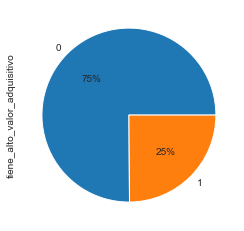

In [282]:
dataset['tiene_alto_valor_adquisitivo'].value_counts().plot(kind='pie', autopct='%1.0f%%')

Vemos que más de las tres cuartas partes de la muestra no tienen un elevado poder adquisitivo.


In [283]:
dataset.describe()

,anios_estudiados,edad,ganancia_perdida_declarada_bolsa_argentina,horas_trabajo_registradas,tiene_alto_valor_adquisitivo
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,14.095783,38.437902,1003.635369,40.931238,0.248922
std,2.638707,13.134665,7430.372730,11.979984,0.432396
min,1.000000,17.000000,-4356.000000,1.000000,0.000000
25%,13.000000,28.000000,0.000000,40.000000,0.000000
50%,14.000000,37.000000,0.000000,40.000000,0.000000
75%,17.000000,47.000000,0.000000,45.000000,0.000000
max,20.000000,90.000000,99999.000000,99.000000,1.000000


A continuación estudiamos la distribución de edades en la muestra tomada, agrupando en en bins de a 10 años, por simplicidad y legibilidad de los gráficos.

<AxesSubplot:>

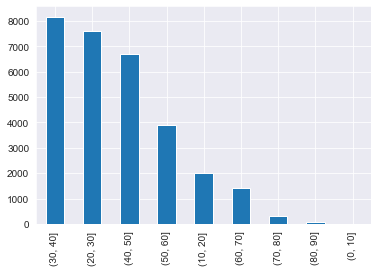

In [284]:
df_tmp = pd.DataFrame(dataset.edad)
df_tmp['bins'] = pd.cut(df_tmp.edad, range(0, int(df_tmp['edad'].max()) + 10,10))

df_tmp['bins'].value_counts().plot(kind='bar')

Veamos ahora qué personas tienen un alto poder adquisitivo según su rango etario.

([<matplotlib.axis.YTick at 0x7fd025f75c88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

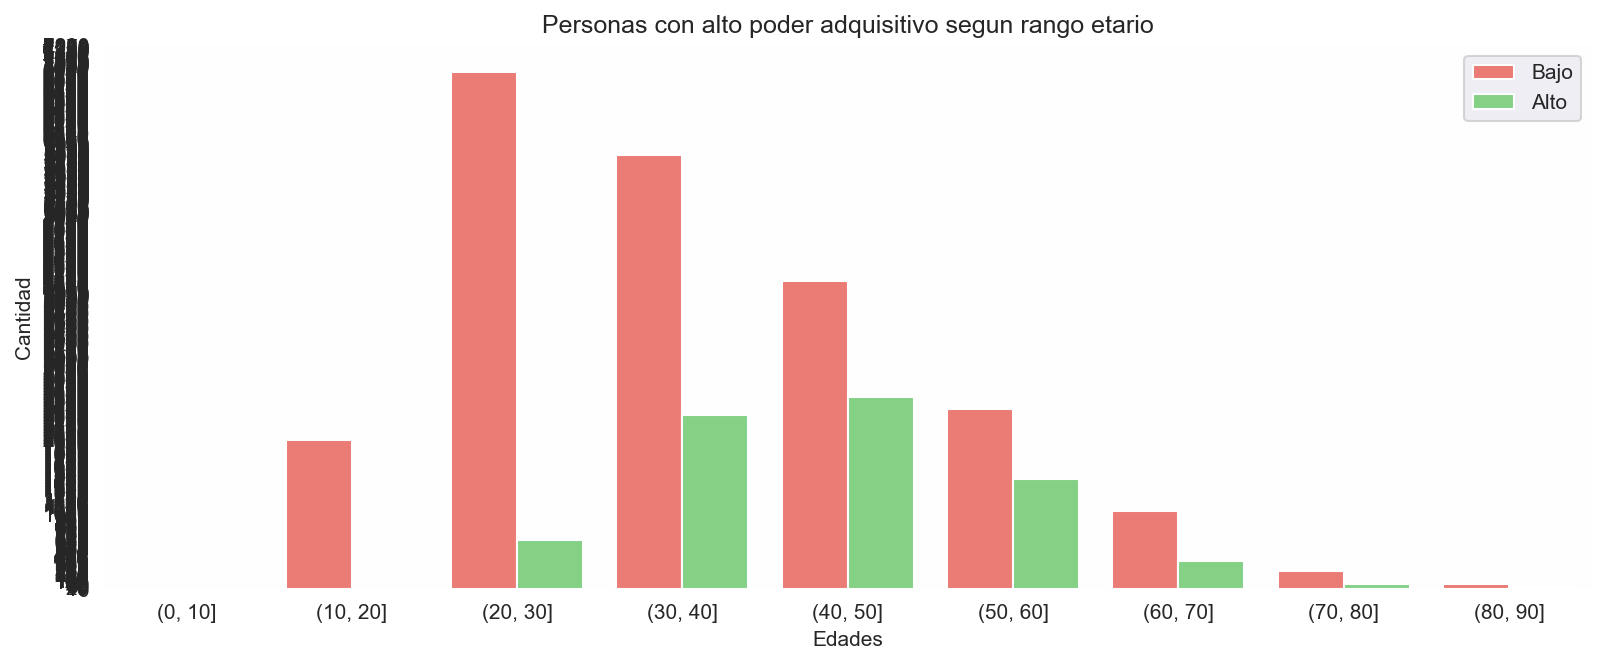

In [285]:
df_tmp = pd.DataFrame([dataset.edad, dataset.tiene_alto_valor_adquisitivo]).transpose()
df_tmp['bins'] = pd.cut(df_tmp.edad, range(0, int(df_tmp['edad'].max()) + 10,10))


# Configuro el grafico, armo el countplot y setteo labels varios
fig, ax = plt.subplots(dpi=150, figsize=(6.4 * 2, 4.8))
sns.countplot(data = df_tmp, x = 'bins', hue='tiene_alto_valor_adquisitivo', ax = ax, palette = ['#ff6961', '#77dd77'])
ax.set_title('Personas con alto poder adquisitivo segun rango etario')
ax.set_xlabel('Edades')
ax.set_ylabel('Cantidad')
plt.legend(['Bajo', 'Alto'], loc='upper right')
plt.yticks(range(0, int(ax.get_ylim()[1]) + 10,10))

## Barrios

In [286]:
dataset.groupby('barrio')['tiene_alto_valor_adquisitivo'].value_counts()



barrio         tiene_alto_valor_adquisitivo
Agronomia      0                               91
               1                                9
Almagro        0                               60
               1                               40
Balvanera      0                               67
                                               ..
Villa Soldati  1                                2
Villa Urquiza  0                               84
               1                               44
nuñez          0                               31
               1                                2
Name: tiene_alto_valor_adquisitivo, Length: 80, dtype: int64